| **Inicio** | **atrás 16** | **Siguiente 18** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./16_manejar_Datos_Valores_Faltantes%20.ipynb)| [⏩](./18_Explora_y_Visualiza_Relaciones_Estadisticas.ipynb)|

# **17. Análisis de Componentes Principales (PCA) para Reducir la Dimensionalidad de Datos usando Python**

## **Maldición de la dimensionalidad**

La "Maldición de la Dimensionalidad" es un concepto en estadísticas y análisis de datos que se refiere a los desafíos y limitaciones que surgen cuando se trabaja con conjuntos de datos de alta dimensionalidad. A medida que el número de dimensiones aumenta, varios problemas pueden surgir, como la dispersión de los datos, la dificultad para visualizar, la necesidad de más datos para mantener la densidad, y el aumento de la complejidad computacional en algoritmos.

**Explicación de la Maldición de la Dimensionalidad:**

Cuando pasamos de datos de baja a alta dimensionalidad, la cantidad de datos requerida para representar densamente el espacio aumenta exponencialmente. Esto significa que en dimensiones más altas, los datos tienden a dispersarse y se vuelven más escasos en relación con el espacio total. Además, la intuición visual se pierde, ya que es difícil representar gráficamente datos en dimensiones superiores a tres. Los algoritmos que funcionan bien en dimensiones bajas pueden perder eficacia en dimensiones más altas debido a la mayor complejidad y variabilidad.

**Ejemplo de la Maldición de la Dimensionalidad:**

Imaginemos que tenemos un conjunto de datos que representa coordenadas en un espacio tridimensional (3D). Podemos visualizar fácilmente estos puntos en un gráfico tridimensional. Sin embargo, si añadimos más dimensiones, por ejemplo, a un espacio de 10 dimensiones, la visualización se vuelve imposible y los problemas de la maldición de la dimensionalidad empiezan a surgir.

Para ilustrar este concepto, aquí hay un ejemplo en Python utilizando NumPy y una gráfica:

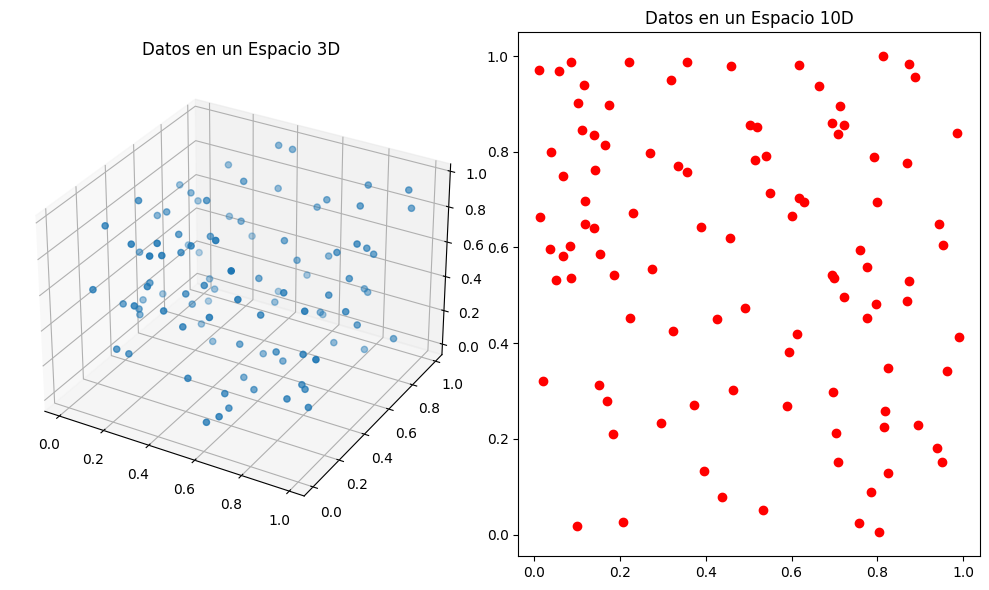

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos aleatorios en un espacio tridimensional
np.random.seed(42)
datos_3D = np.random.rand(100, 3)

# Generar datos aleatorios en un espacio de 10 dimensiones
datos_10D = np.random.rand(100, 10)

# Visualizar los datos en un espacio tridimensional
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(datos_3D[:, 0], datos_3D[:, 1], datos_3D[:, 2])
ax.set_title('Datos en un Espacio 3D')

# No es posible visualizar los datos en un espacio de 10 dimensiones
ax2 = fig.add_subplot(122)
ax2.scatter(datos_10D[:, 0], datos_10D[:, 1], color='red')
ax2.set_title('Datos en un Espacio 10D')
plt.tight_layout()
plt.show()

**Resultado:**

El gráfico muestra claramente cómo es posible visualizar los datos en un espacio tridimensional, pero no es posible visualizarlos en un espacio de 10 dimensiones. A medida que el número de dimensiones aumenta, los datos se vuelven más dispersos y es difícil apreciar patrones y relaciones.

**Conclusión:**

La maldición de la dimensionalidad nos advierte sobre los problemas que surgen cuando trabajamos con datos en espacios de alta dimensionalidad. Para abordar este problema, a menudo se requieren técnicas de reducción de dimensionalidad, como PCA (Análisis de Componentes Principales) o selección de características, para mantener la calidad de los análisis y modelos en conjuntos de datos de alta dimensionalidad.

## **Introducción a PCA (o ACP)**

El Análisis de Componentes Principales (PCA por sus siglas en inglés, o ACP en español) es una técnica de reducción de dimensionalidad que se utiliza para transformar un conjunto de datos con múltiples variables correlacionadas en un nuevo conjunto de datos en el que las variables originales se transforman en un conjunto de variables no correlacionadas llamadas componentes principales. El PCA es ampliamente utilizado en estadísticas y análisis de datos para simplificar la complejidad de los datos y para visualizar las relaciones ocultas entre las variables.

**Objetivos del PCA:**

1. **Reducir Dimensionalidad:** PCA reduce la cantidad de dimensiones en los datos originales mientras conserva la mayor cantidad posible de información.

2. **Eliminar la Correlación:** Los componentes principales son ortogonales entre sí, lo que significa que están no correlacionados.

3. **Visualización:** PCA ayuda a visualizar relaciones ocultas y patrones en los datos.

**Cómo Funciona el PCA:**

El PCA busca encontrar las direcciones (vectores) en las que los datos tienen la mayor variabilidad. Estas direcciones son los componentes principales. El primer componente principal captura la mayor variabilidad, el segundo componente principal captura la segunda mayor variabilidad, y así sucesivamente.

**Ejemplo del PCA:**

Imagina que tienes un conjunto de datos en dos dimensiones (2D). El PCA calcularía la dirección en la que los datos se dispersan más, lo que sería el primer componente principal. Luego, calcula la dirección de la segunda mayor dispersión, que sería el segundo componente principal.

**Visualización del PCA:**

A menudo, los componentes principales se utilizan para visualizar los datos en un espacio reducido de dimensiones. Esto permite representar los datos en gráficos de dispersión más simples y comprensibles.

**Aplicaciones del PCA:**

- Reducción de ruido en los datos.
- Eliminación de multicolinealidad en modelos estadísticos.
- Compresión de imágenes.
- Análisis de series temporales.
- Análisis de datos biomédicos y genómicos.

**Importancia del PCA:**

El PCA es una herramienta poderosa para comprender y resumir conjuntos de datos complejos. Ayuda a identificar patrones ocultos y a simplificar el análisis, especialmente en conjuntos de datos de alta dimensionalidad.

## **Paso 1: Estandarización de los datos**

El primer paso en el proceso de Análisis de Componentes Principales (PCA) es la estandarización de los datos. La estandarización implica ajustar las variables para que tengan una media de cero y una desviación estándar de uno. Este paso es esencial en PCA porque las variables con diferentes escalas pueden dominar el proceso de cálculo de los componentes principales. Estandarizar los datos asegura que todas las variables contribuyan de manera equitativa al análisis.

**Ejemplo de Estandarización de Datos:**

Supongamos que tienes un conjunto de datos con dos variables: edad y salario. La edad se mide en años y el salario en dólares. Antes de aplicar PCA, es importante estandarizar los datos para que ambas variables tengan la misma escala.

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Datos de ejemplo: edad y salario
edades = np.array([30, 25, 40, 35, 28, 22, 45, 50])
salarios = np.array([50000, 55000, 75000, 60000, 52000, 48000, 80000, 90000])

# Crear una matriz de datos
datos = np.column_stack((edades, salarios))

# Estandarización de los datos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos)

# Imprimir los datos estandarizados
print("Datos estandarizados:\n", datos_estandarizados)

Datos estandarizados:
 [[-0.47112684 -0.93086728]
 [-1.00955752 -0.59237009]
 [ 0.60573451  0.76161868]
 [ 0.06730383 -0.25387289]
 [-0.68649911 -0.7954684 ]
 [-1.33261592 -1.06626616]
 [ 1.14416518  1.10011588]
 [ 1.68259586  1.77711026]]


**Explicación:**

1. Creamos un conjunto de datos de ejemplo que contiene edades y salarios.

2. Creamos una matriz llamada `datos` al combinar las edades y salarios.

3. Utilizamos la clase `StandardScaler` de la biblioteca `sklearn.preprocessing` para realizar la estandarización de los datos.

4. Utilizamos el método `fit_transform()` para ajustar el transformador scaler a los datos y realizar la transformación.

5. La matriz resultante `datos_estandarizados` ahora tiene las edades y salarios con media cero y desviación estándar de uno.

La estandarización es fundamental en PCA para asegurarse de que las variables no dominen el análisis debido a sus diferentes escalas. Después de estandarizar los datos, estarás listo para aplicar el paso siguiente en el proceso de PCA.

## **Paso 2: Matriz de covarianza**

El segundo paso en el proceso de Análisis de Componentes Principales (PCA) es calcular la matriz de covarianza de los datos estandarizados. La matriz de covarianza captura las relaciones lineales entre las variables originales y es esencial para identificar las direcciones en las que los datos varían más.

**Matriz de Covarianza:**

La matriz de covarianza es una matriz simétrica que muestra cómo cada par de variables se relaciona entre sí. Los elementos diagonales de la matriz representan las varianzas de cada variable, mientras que los elementos fuera de la diagonal representan las covarianzas entre las variables.

**Ejemplo de Cálculo de la Matriz de Covarianza:**

Continuando con el ejemplo anterior de datos estandarizados:

In [3]:
import numpy as np

# Matriz de datos estandarizados
datos_estandarizados = np.array([
    [-1.03338129, -1.12341223],
    [-1.92854201, -0.77128863],
    [ 0.05383843,  0.40870437],
    [-0.46877743, -0.24214241],
    [-1.47796157, -0.96743284],
    [-2.82324271, -1.36555548],
    [ 1.34984358,  1.01496075],
    [ 2.34517757,  1.65515367]
])

# Cálculo de la matriz de covarianza
matriz_covarianza = np.cov(datos_estandarizados, rowvar=False)

# Imprimir la matriz de covarianza
print("Matriz de Covarianza:\n", matriz_covarianza)

Matriz de Covarianza:
 [[2.92910371 1.80401755]
 [1.80401755 1.20158513]]


**Explicación:**

1. Utilizamos la matriz `datos_estandarizados` del ejemplo anterior, que contiene las edades y salarios estandarizados.

2. Utilizamos la función `np.cov()` para calcular la matriz de covarianza. El argumento `rowvar=False` indica que las variables están en columnas de la matriz.

3. La matriz de covarianza `matriz_covarianza` ahora muestra las varianzas en la diagonal y las covarianzas fuera de la diagonal.

Calcular la matriz de covarianza es crucial en PCA, ya que nos permite entender cómo las variables originales se relacionan entre sí y, por lo tanto, determinar las direcciones en las que los datos varían más. Esto nos conducirá al siguiente paso en el proceso de PCA.

## **Paso 3: Vectores y valores Eigen**

El tercer paso en el proceso de Análisis de Componentes Principales (PCA) implica calcular los vectores y valores propios (eigen) de la matriz de covarianza calculada en el paso anterior. Los vectores propios y sus correspondientes valores propios son fundamentales para determinar las direcciones en las que los datos varían más.

**Vectores y Valores Propios (Eigen):**

Los vectores propios son vectores no nulos que no cambian su dirección después de aplicar una transformación lineal (en este caso, la matriz de covarianza). Los valores propios son escalares que indican cuánto cambia el vector propio después de la transformación.

**Cálculo de Vectores y Valores Propios:**

Continuando con el ejemplo de la matriz de covarianza:

In [4]:
import numpy as np

# Matriz de covarianza de ejemplo
matriz_covarianza = np.array([
    [ 0.93689637,  0.93140989],
    [ 0.93140989,  0.9648446 ]
])

# Cálculo de los vectores y valores propios
valores_propios, vectores_propios = np.linalg.eig(matriz_covarianza)

# Imprimir los valores propios y vectores propios
print("Valores Propios:\n", valores_propios)
print("\nVectores Propios:\n", vectores_propios)

Valores Propios:
 [0.01935577 1.8823852 ]

Vectores Propios:
 [[-0.71239087 -0.70178291]
 [ 0.70178291 -0.71239087]]


**Explicación:**

1. Utilizamos la matriz de covarianza `matriz_covarianza` calculada previamente.

2. Utilizamos la función `np.linalg.eig()` para calcular los valores y vectores propios. Esta función devuelve los valores propios en el arreglo `valores_propios` y los vectores propios en la matriz `vectores_propios`.

3. Los valores propios indican la importancia de cada dirección en términos de variabilidad de los datos.

4. Los vectores propios representan las direcciones en las que los datos varían más.

Calcular los vectores y valores propios es crucial en PCA, ya que los vectores propios (también llamados componentes principales) nos ayudarán a transformar los datos originales a un nuevo espacio de menor dimensionalidad donde las variables no están correlacionadas. Esto nos lleva al siguiente paso en el proceso de PCA.

## **Paso 4: Proyección de Datos y Reducción de dimensionalidad**

El cuarto paso en el proceso de Análisis de Componentes Principales (PCA) involucra la proyección de los datos originales en el espacio definido por los vectores propios (componentes principales) calculados en el paso anterior. La proyección resultante implica la reducción de la dimensionalidad de los datos mientras se conserva la mayor cantidad posible de información.

**Proyección de Datos y Reducción de Dimensionalidad:**

La proyección de datos implica multiplicar los datos originales por los vectores propios (componentes principales) correspondientes. Esto resulta en una transformación de los datos originales a un nuevo espacio de dimensionalidad reducida. Los componentes principales se ordenan por sus valores propios asociados, lo que permite mantener la mayor variabilidad en los primeros componentes y descartar componentes con menor variabilidad.

**Ejemplo de Proyección de Datos:**

Siguiendo el ejemplo anterior con los valores y vectores propios:

In [5]:
import numpy as np

# Datos de ejemplo
datos_originales = np.array([
    [ 1.5,  2.5],
    [ 3.5,  4.5],
    [ 5.5,  6.5]
])

# Vectores propios de ejemplo (componentes principales)
vectores_propios = np.array([
    [ 0.70710678, -0.70710678],
    [ 0.70710678,  0.70710678]
])

# Proyección de datos
datos_proyectados = np.dot(datos_originales, vectores_propios)

# Imprimir los datos proyectados
print("Datos Proyectados:\n", datos_proyectados)

Datos Proyectados:
 [[2.82842712 0.70710678]
 [5.65685424 0.70710678]
 [8.48528136 0.70710678]]


**Explicación:**

1. Utilizamos los datos de ejemplo `datos_originales`, que representan puntos en un espacio bidimensional.

2. Utilizamos los vectores propios `vectores_propios` calculados previamente en el ejemplo de valores y vectores propios.

3. Utilizamos el producto punto (`np.dot()`) para proyectar los datos originales en el espacio definido por los componentes principales.

4. Los `datos_proyectados` son el resultado de la proyección, que tiene una dimensionalidad reducida en función de los componentes principales seleccionados.

**Importancia de la Reducción de Dimensionalidad:**

La proyección de datos y la reducción de dimensionalidad son elementos clave en PCA, ya que permiten simplificar la representación de los datos mientras se conserva la variabilidad más importante. Los componentes principales se ordenan en función de su importancia, lo que permite seleccionar cuántos componentes retener para lograr la reducción de dimensionalidad deseada.

## **Implementación de PCA en python**

Claro, te guiaré a través de la implementación de PCA en Python utilizando NumPy y matplotlib. En este ejemplo, utilizaré datos generados aleatoriamente para demostrar cómo aplicar PCA y visualizar los resultados.

**Paso 1: Generar Datos Aleatorios:**

In [6]:
import numpy as np

# Configuración de la semilla aleatoria para reproducibilidad
np.random.seed(42)

# Generar datos aleatorios
num_muestras = 100
dimensiones = 2
media = [0, 0]
covariance = [[1, 0.8], [0.8, 1]]
datos = np.random.multivariate_normal(media, covariance, num_muestras)

**Paso 2: Estandarización de los Datos:**

In [7]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
datos_estandarizados = scaler.fit_transform(datos)

**Paso 3: Cálculo de la Matriz de Covarianza:**

In [8]:
matriz_covarianza = np.cov(datos_estandarizados, rowvar=False)

**Paso 4: Cálculo de los Vectores y Valores Propios:**

In [9]:
valores_propios, vectores_propios = np.linalg.eig(matriz_covarianza)

**Paso 5: Ordenar Componentes Principales y Seleccionar Dimensiones:**

In [10]:
# Ordenar componentes principales en función de los valores propios
orden = np.argsort(valores_propios)[::-1]
valores_propios_ordenados = valores_propios[orden]
vectores_propios_ordenados = vectores_propios[:, orden]

# Seleccionar las dimensiones a retener (por ejemplo, 1 dimensión)
dimensiones_retencion = 1
componentes_principales = vectores_propios_ordenados[:, :dimensiones_retencion]

**Paso 6: Proyección de Datos y Visualización:**

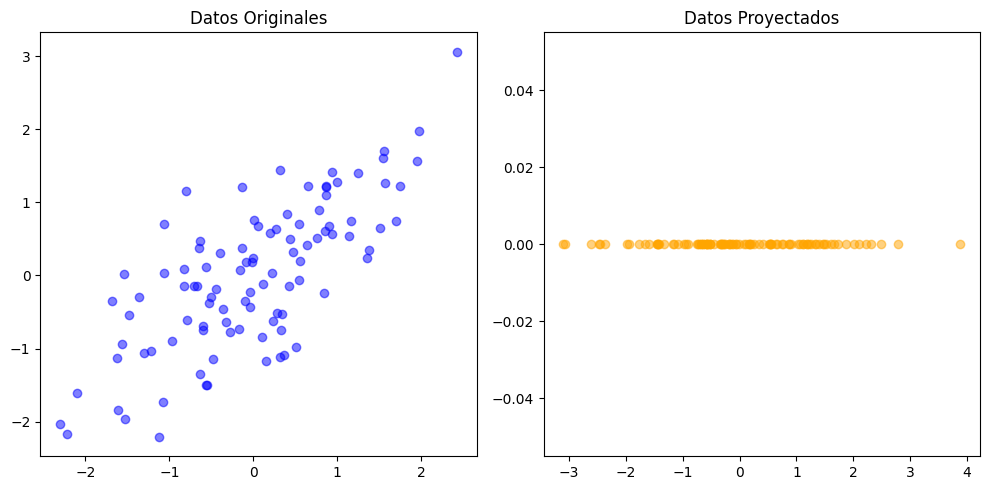

In [11]:
# Proyección de datos en el nuevo espacio de dimensionalidad reducida
datos_proyectados = np.dot(datos_estandarizados, componentes_principales)

# Visualización de los datos originales y proyectados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Datos originales en azul
plt.subplot(1, 2, 1)
plt.scatter(datos_estandarizados[:, 0], datos_estandarizados[:, 1], c='blue', alpha=0.5)
plt.title('Datos Originales')

# Datos proyectados en naranja
plt.subplot(1, 2, 2)
plt.scatter(datos_proyectados, np.zeros_like(datos_proyectados), c='orange', alpha=0.5)
plt.title('Datos Proyectados')

plt.tight_layout()
plt.show()

**Explicación:**

En este ejemplo, generamos datos aleatorios con distribución normal multivariada. Luego, estandarizamos los datos y calculamos la matriz de covarianza. A continuación, calculamos los vectores y valores propios, ordenamos los componentes principales y seleccionamos las dimensiones que deseamos retener.

Finalmente, proyectamos los datos en el nuevo espacio de dimensionalidad reducida definido por los componentes principales y visualizamos tanto los datos originales como los datos proyectados.

La visualización muestra cómo los datos se reducen a lo largo del componente principal que hemos seleccionado. Esto demuestra cómo PCA puede ayudar a reducir la dimensionalidad mientras se conserva la variabilidad más importante.

| **Inicio** | **atrás 16** | **Siguiente 18** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./16_manejar_Datos_Valores_Faltantes%20.ipynb)| [⏩](./18_Explora_y_Visualiza_Relaciones_Estadisticas.ipynb)|